In [1]:
import src.estimators as estimators
from PIL import Image
import numpy as np
from math import sqrt, log, exp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.unicode_minus'] = False

We load three datasets which are images of the 3D-model of a monkey with 1, 2 or 3 euler angles randomized.

In [2]:
monkey1 = np.zeros((200, 64*64))
for i in range(200):
    x = "%04d.png" % (i+1)
    image = Image.open('monkey1/'+x)
    monkey1[i] = np.asarray(image)[:,:,0].reshape(64*64)/256

monkey2 = np.zeros((200, 64*64))
for i in range(200):
    x = "%04d.png" % (i+1)
    image = Image.open('monkey2/'+x)
    monkey2[i] = np.asarray(image)[:,:,0].reshape(64*64)/256

monkey3 = np.zeros((200, 64*64))
for i in range(200):
    x = "%04d.png" % (i+1)
    image = Image.open('monkey3/'+x)
    monkey3[i] = np.asarray(image)[:,:,0].reshape(64*64)/256

We now estimate the dimensions of these three datasets.

The scaling factor $eps$ is chosen as small as possible to obtain more than the desired number of pairs.

## 1 Euler angle randomized

30 pairs

In [3]:
eps = 0.05
e1 = eps*1.5
e2 = eps*0.19
d = estimators.corsum(monkey1, e1, e2, noboxes=True)

There are 31 pairs of points at distance at most 0.07500000000000001
There are 3 pairs of points at distance at most 0.009500000000000001
The correlation dimension is 1.1302773598724403


122 pairs

In [4]:
eps = 0.23
e1 = eps*0.78
e2 = eps*0.2
d = estimators.corsum(monkey1, e1, e2, noboxes=True)

There are 122 pairs of points at distance at most 0.1794
There are 14 pairs of points at distance at most 0.046000000000000006
The correlation dimension is 1.590742845738278


249 pairs

In [5]:
eps = 0.44
e1 = eps*0.63
e2 = eps*0.23
d = estimators.corsum(monkey1, e1, e2, noboxes=True)

There are 247 pairs of points at distance at most 0.2772
There are 47 pairs of points at distance at most 0.1012
The correlation dimension is 1.646659416418789


516 pairs

In [6]:
eps = 0.89
e1 = eps*0.54
e2 = eps*0.23
d = estimators.corsum(monkey1, e1, e2, noboxes=True)

There are 522 pairs of points at distance at most 0.4806
There are 152 pairs of points at distance at most 0.20470000000000002
The correlation dimension is 1.4455791068046342


## 2 Euler angles randomized

30 pairs

In [7]:
eps = 0.52
e1 = eps*1.5
e2 = eps*0.19
d = estimators.corsum(monkey2, e1, e2, noboxes=True)

There are no pairs of points at distance 0.0988
And 28 pairs of points at distance 0.78


122 pairs

In [8]:
eps = 2.1
e1 = eps*0.78
e2 = eps*0.2
d = estimators.corsum(monkey2, e1, e2, noboxes=True)

There are 125 pairs of points at distance at most 1.6380000000000001
There are 8 pairs of points at distance at most 0.42000000000000004
The correlation dimension is 2.0197792454904855


249 pairs

In [9]:
eps = 3.6
e1 = eps*0.63
e2 = eps*0.23
d = estimators.corsum(monkey2, e1, e2, noboxes=True)

There are 240 pairs of points at distance at most 2.2680000000000002
There are 31 pairs of points at distance at most 0.8280000000000001
The correlation dimension is 2.031132827239829


516 pairs

In [10]:
eps = 5.9
e1 = eps*0.54
e2 = eps*0.23
d = estimators.corsum(monkey2, e1, e2, noboxes=True)

There are 515 pairs of points at distance at most 3.1860000000000004
There are 87 pairs of points at distance at most 1.3570000000000002
The correlation dimension is 2.0835149033771856


## 3 Euler angles randomized

30 pairs

In [11]:
eps = 1.5
e1 = eps*1.5
e2 = eps*0.19
d = estimators.corsum(monkey3, e1, e2, noboxes=True)

There are no pairs of points at distance 0.28500000000000003
And 28 pairs of points at distance 2.25


122 pairs

In [12]:
eps = 4.6
e1 = eps*0.78
e2 = eps*0.2
d = estimators.corsum(monkey3, e1, e2, noboxes=True)

There are 124 pairs of points at distance at most 3.5879999999999996
There are 1 pairs of points at distance at most 0.9199999999999999
The correlation dimension is 3.54178149101792


249 pairs

In [13]:
eps = 7
e1 = eps*0.63
e2 = eps*0.23
d = estimators.corsum(monkey3, e1, e2, noboxes=True)

There are 257 pairs of points at distance at most 4.41
There are 9 pairs of points at distance at most 1.61
The correlation dimension is 3.32643583972315


516 pairs

In [14]:
eps = 9.8
e1 = eps*0.54
e2 = eps*0.23
d = estimators.corsum(monkey3, e1, e2, noboxes=True)

There are 508 pairs of points at distance at most 5.292000000000001
There are 28 pairs of points at distance at most 2.2540000000000004
The correlation dimension is 3.395795513165663


# Log-log plots

Data set 1

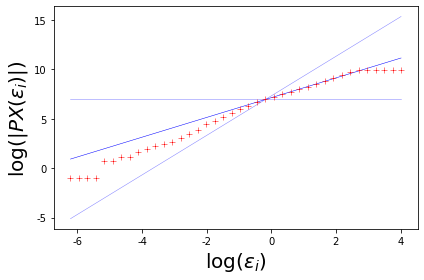

In [15]:
scales = []
e0 = 0.002
for i in range(1,41):
    scales.append(e0)
    e0 *= 1.3
    
count = estimators.count_scales(monkey1, scales, noboxes=True)
    
X = [log(x) for x in scales]
Y = [log(y) if y>0 else -1 for y in count]

plt.scatter(X,Y, zorder=10, color='red', marker="+", linewidth=0.5)
plt.plot(X, [Y[23]-0*X[23]+0*i for i in X], color="blue", alpha=0.5, linewidth=0.5)
plt.plot(X, [Y[23]-1*X[23]+1*i for i in X], color="blue", alpha=1, linewidth=0.5)
plt.plot(X, [Y[23]-2*X[23]+2*i for i in X], color="blue", alpha=0.5, linewidth=0.5)

plt.xlabel(r'$\log(\varepsilon_i)$', fontsize=20)
plt.ylabel(r'$\log(\vert PX(\epsilon_i)\vert)$', fontsize=20)

plt.tight_layout()
plt.show()

Data set 2

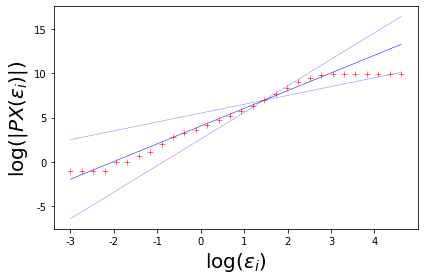

In [16]:
scales = []
e0 = 0.05
for i in range(1,31):
    scales.append(e0)
    e0 *= 1.3
    
count = estimators.count_scales(monkey2, scales, noboxes=True)
    
X = [log(x) for x in scales]
Y = [log(y) if y>0 else -1 for y in count]

plt.scatter(X,Y, zorder=10, color='red', marker="+", linewidth=0.5)
plt.plot(X, [Y[17]-1*X[17]+1*i for i in X], color="blue", alpha=0.5, linewidth=0.5)
plt.plot(X, [Y[17]-2*X[17]+2*i for i in X], color="blue", alpha=1, linewidth=0.5)
plt.plot(X, [Y[17]-3*X[17]+3*i for i in X], color="blue", alpha=0.5, linewidth=0.5)

plt.xlabel(r'$\log(\varepsilon_i)$', fontsize=20)
plt.ylabel(r'$\log(\vert PX(\epsilon_i)\vert)$', fontsize=20)

plt.tight_layout()
plt.show()

Data set 3

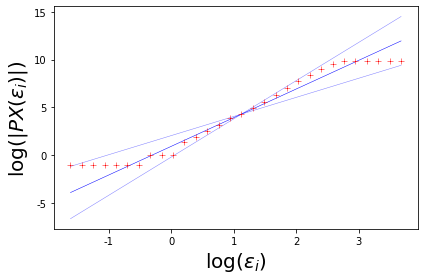

In [17]:
scales = []
e0 = 0.2
for i in range(1,31):
    scales.append(e0)
    e0 *= 1.2
    
count = estimators.count_scales(monkey3, scales, noboxes=True)
    
X = [log(x) for x in scales]
Y = [log(y) if y>0 else -1 for y in count]

plt.scatter(X,Y, zorder=10, color='red', marker="+", linewidth=0.5)
plt.plot(X, [Y[15]-2*X[15]+2*i for i in X], color="blue", alpha=0.5, linewidth=0.5)
plt.plot(X, [Y[15]-3*X[15]+3*i for i in X], color="blue", alpha=1, linewidth=0.5)
plt.plot(X, [Y[15]-4*X[15]+4*i for i in X], color="blue", alpha=0.5, linewidth=0.5)

plt.xlabel(r'$\log(\varepsilon_i)$', fontsize=20)
plt.ylabel(r'$\log(\vert PX(\epsilon_i)\vert)$', fontsize=20)

plt.tight_layout()
plt.show()